In [ ]:
# from google.colab import drive

# drive.mount('/content/gdrive')
# root_path = 'gdrive/My Drive/Python/TSP_GA'

In [2]:
%load_ext autoreload

In [3]:
import sys

sys.path.append("..")

In [4]:
%autoreload 2

import os

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import optimize
from scipy.spatial import distance
from matplotlib import lines
from tqdm import tqdm

from src.solvers.genetic import GeneticOptimizer
from src import plotting; plotting.set_style()

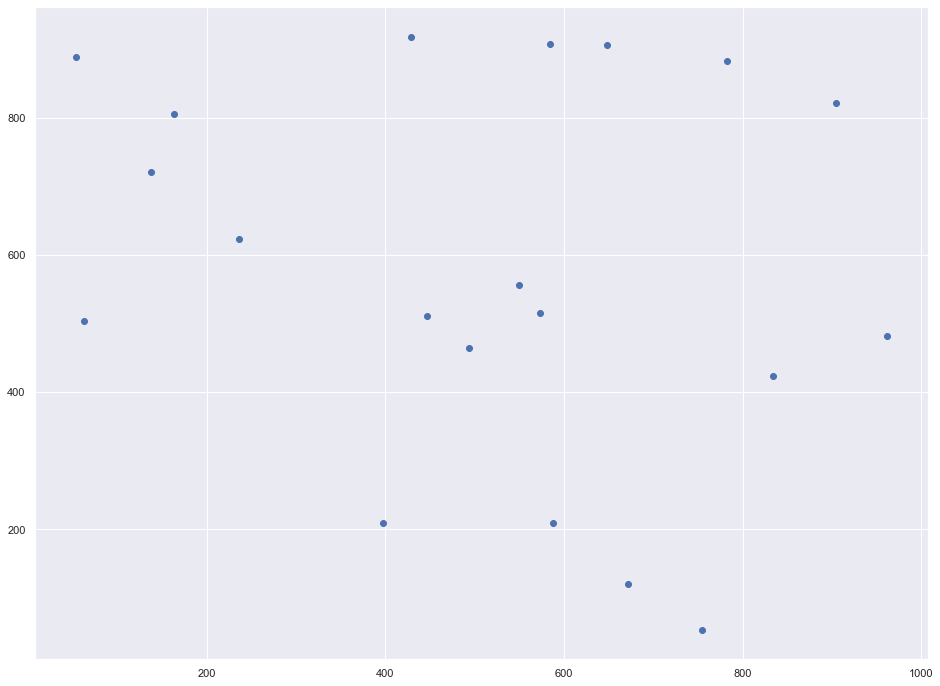

In [5]:
figure = plt.figure(figsize=[16, 12])
df_cities = pd.read_csv(r"../data/cites-data.csv")
df_cities = df_cities.iloc[:20]
coordinates = np.column_stack((np.array(df_cities['X']), np.array(df_cities['Y'])))
plt.scatter(coordinates[:, 0], coordinates[:, 1])

In [6]:
optimizer = GeneticOptimizer(coordinates)

In [8]:
best_route, value = optimizer.minimize(
    coordinates,
    num_steps=200,
    population_size=100,
    crossover_rate=1.0,
    mutation_rate=0.8,
    elitism_rate=0.05,
    extra_initialization_rate=1.0,
    crossover_operator='OX',
    mutation_operator='Inversion',
    crossover_schedule_type='decreasing_root',
    mutation_schedule_type='increasing_root' ,
    patience=10,
    logging=False,
    silent=False,
    logging_path=os.path.join("ga_best_route_logs.txt"))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [03:00<00:00,  1.11it/s]


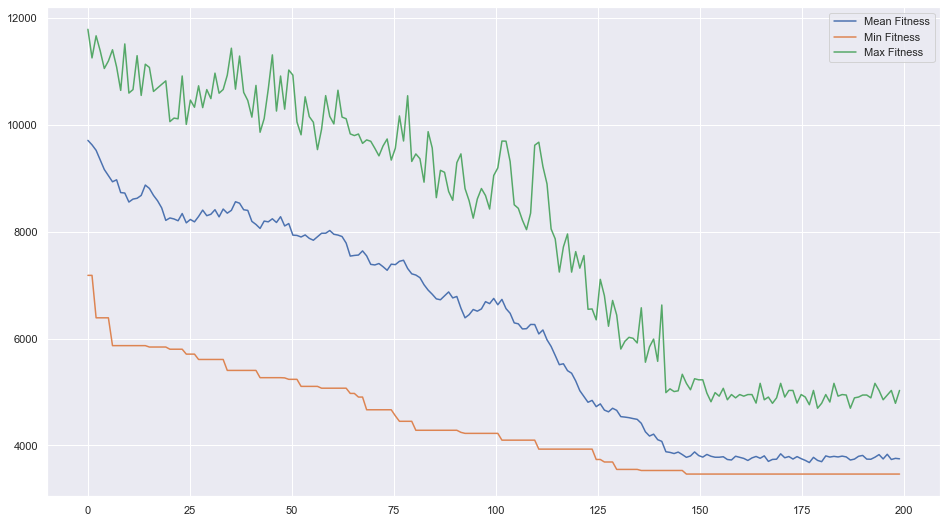

In [11]:
plotting.history(optimizer.history)

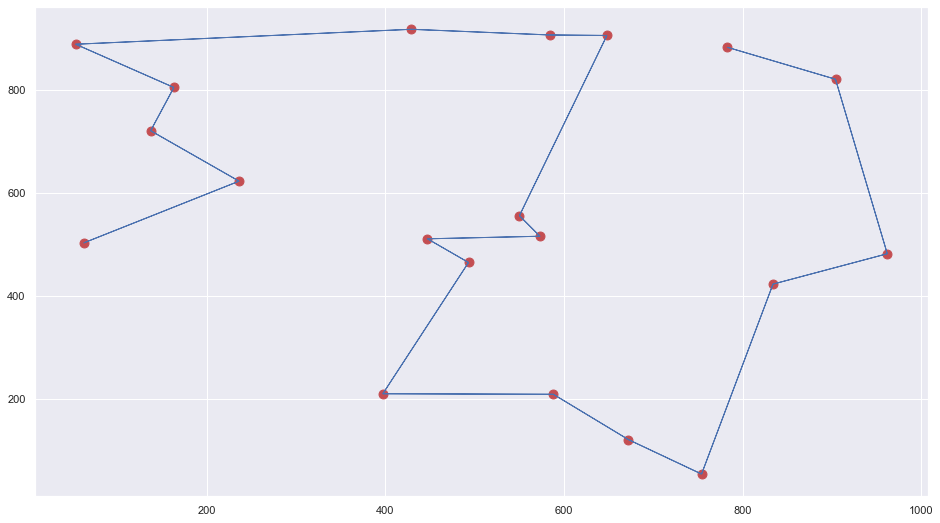

In [12]:
plotting.route(best_route, coordinates)